<h3 style="color: #001a79;">Exercise 2.1</h3>

<hr style="border-top: 1px solid #001a79;" />

<h4>Exercise 1:</h4>
Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

The Absolute Value Function is a function in which the definition of the function contains an algebraic expression within the absolute value symbols. An example of an absolute value function is f(x)=|x|.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Change style and size of plots
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams["figure.autolayout"] = True

# x values
x = np.arange(-5, 5, 0.2)

# f(x)=|x|
f_x = abs(x)

The function f(x) is then plotted below. 

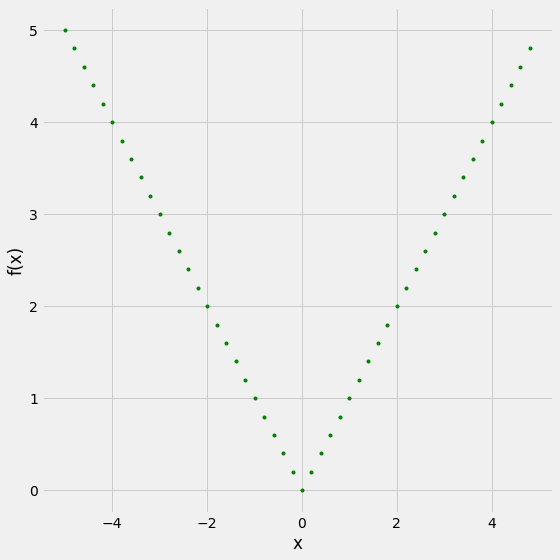

In [2]:
# Creating plot
plt.plot(x, f_x, 'g.')

# plot labels defined
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

Below I will give more examples of plotting Absolute Value Functions. 

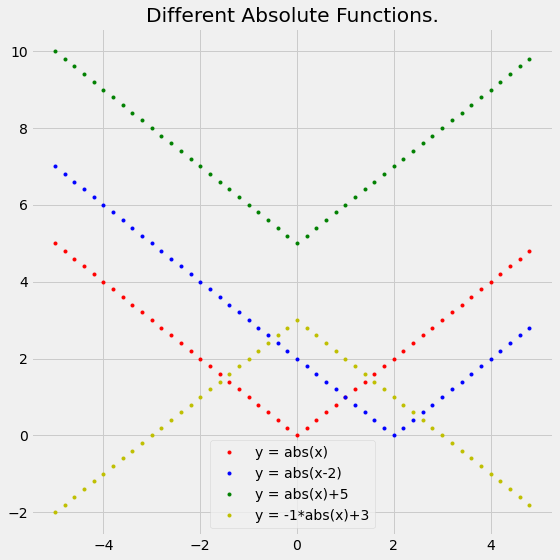

In [3]:
# f(x)=|x-2|+5
f_x2 = abs(x-2)

# f(x)=|x|+5
f_x3 = abs(x)+5

# f(x)=-1|x-2|+3
f_x4 = -1*abs(x)+3

# Defining plot labels
plt.plot(x, f_x, 'r.', label = "y = abs(x)")
plt.plot(x, f_x2, 'b.', label ="y = abs(x-2)")
plt.plot(x, f_x3, 'g.', label = "y = abs(x)+5")
plt.plot(x, f_x4, 'y.', label ="y = -1*abs(x)+3")

#plot title and legend
plt.title('Different Absolute Functions.')
plt.legend()
plt.show()

The above graphs shows the usual v-shaped graph of y=f(x).

<h4>Why is the Absolute Value function not usually used to fit straight lines to data?</h4>

To find a line of best fit to a set of data we need to find a line that has the leased error or least total vertical distance from point to line, which is the sum of the error/vertical distance from points the the fitted line to the data points.
    
The reason why we choose to square the values instead of taking the absolute values as we want to penalise values that are further form the line more so than the points that lie closely to the line[1]. The absolue values formula may in fact yield a line that is a better fit that we get from the least squares method. If we used absolute avlues we may find more than oner line that fits our data 'best', with the sqaures method we will only find one line that fits best[2] 



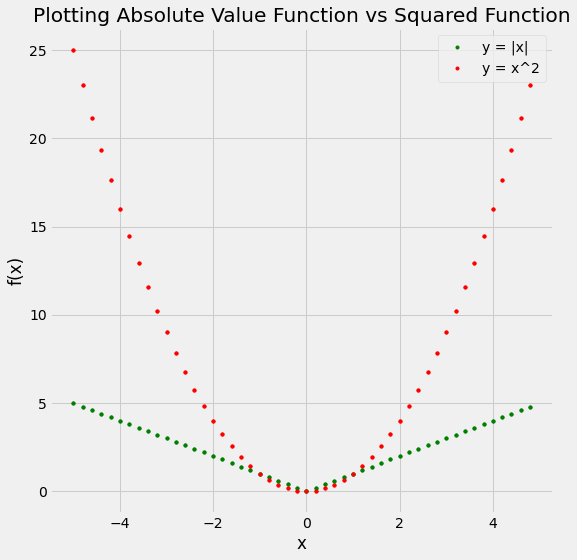

In [4]:
# f(x)=x^2
f_x_sq = x**2

# Creating plot
plt.plot(x, f_x, 'g.')
plt.plot(x, f_x_sq, 'r.')

# plot labels defined
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(x, f_x, 'g.', label = "y = |x|")
plt.plot(x, f_x_sq, 'r.', label ="y = x^2")

#plot title and legend
plt.title('Plotting Absolute Value Function vs Squared Function')
plt.legend()
plt.show()

I have researched comparing the use of Mean Squared Error vs Mean Absolute Error for evaluating a line of best fit. This code has been adopted form the following source: [3]

In [5]:

def mae(data, ref):
    mae = 0
    c = 0
    for i in data:
      mae += abs(i-ref)
      c += 1
    return mae / c
    
def mse(data, ref):
    mse = 0
    c = 0
    for i in data:
      mse += (i-ref)**2
      c += 1
    return mse / c



In [6]:
num_sets = 1000
num_points = 1000

# Generates x sets with y data points each
data = np.random.normal(100, 20, (num_sets, num_points))

In [7]:
import seaborn as sns
def evaluate_metrics(data, num_outliers, amplitude_outliers):
    
    # Sample random "num_ouliers" points for each set
    noise = np.random.uniform(0, num_points, (num_sets, num_outliers))
    
    # Lists to keep the metrics for all original sets
    mae_original = []
    mse_original = []
    # Lists to keep the metrics for all noisy sets
    mae_noisy = []
    mse_noisy = []
    
    # For each observation set, evaluates all three distances to the mean of the set
    for i in range(data.shape[0]):
        # Recovers the observations
        observations = data[i]
        # Create a noisy verion of the data with the randomly-chosen outliers
        outliers = [int(i) for i in noise[i]]
        observations_noisy = []
        c  = 0
        for x in observations:
            if c in outliers:
                observations_noisy.append(x * amplitude_outliers)
            else:
                observations_noisy.append(x)
            c += 1
            
        # Calculates the mean value of the set.
        # It is important to use the mean of the original set in both cases, to prevent it from shifting and altering the result.
        set_mean = np.mean(observations)
        
        # Evaluate the metrics
        mae_original.append(mae(observations, set_mean))
        mse_original.append(mse(observations, set_mean))

        mae_noisy.append(mae(observations_noisy, set_mean))
        mse_noisy.append(mse(observations_noisy, set_mean))

        
    # Plots all
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(1, 2, 1)
    ax3 = plt.subplot(1, 2, 2)
    sns.histplot(mae_original, ax = ax1, color = 'maroon', kde = True, fill = False)
    sns.histplot(mae_noisy, ax = ax1, color = 'r', kde = True)
    sns.histplot(mse_original, ax = ax3, color = 'darkblue', kde = True, fill = False)
    sns.histplot(mse_noisy, ax = ax3, color = 'b', kde = True)
    ax1.legend(["Original", "Noisy"], loc = 'lower right')
    ax3.legend(["Original", "Noisy"], loc = 'lower right')
    ax1.set_title("MAE")
    ax3.set_title("MSE")
    plt.tight_layout()

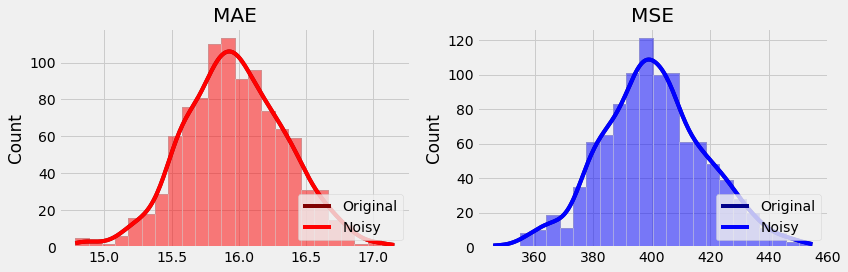

In [8]:
evaluate_metrics(data, num_outliers = 0, amplitude_outliers = 1)

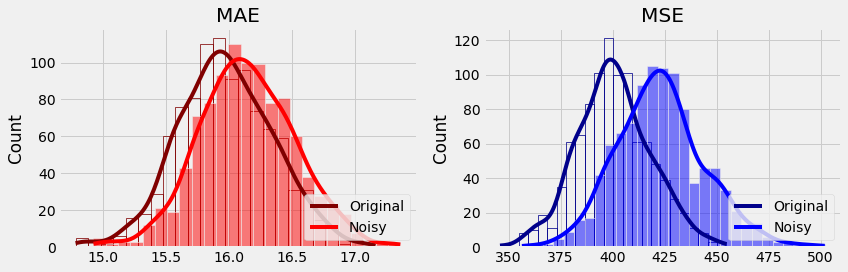

In [9]:
evaluate_metrics(data, num_outliers = 2, amplitude_outliers = 2)

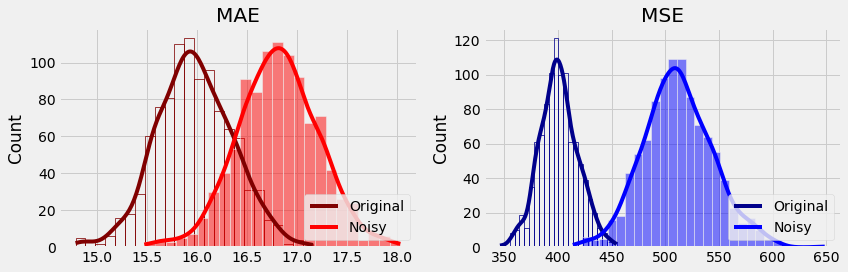

In [10]:
evaluate_metrics(data, num_outliers = 10, amplitude_outliers = 2)

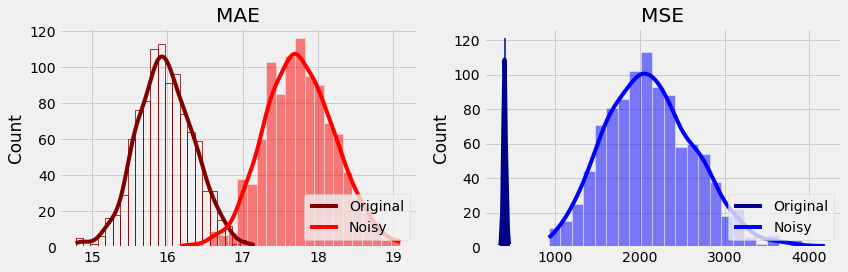

In [11]:
evaluate_metrics(data, num_outliers = 2, amplitude_outliers = 10)

To conclude, now that it is clear the effects outliers can have in squared errors such as MSE or RMSE, it is important to say that in applications which are clear of noise these metrics can do more good than harm, since they can minimize greater errors even though it means accepting more frequent, smaller errors[4] 

<hr style="border-top: 1px solid #001a79;" />
<hr style="border-top: 1px solid #001a79;" />
<h3 style="color: #001a79;">Exercise 2.2</h3>

<hr style="border-top: 1px solid #001a79;" />

<h4>Exercise 2:</h4>
Fit a straight line to the following data points, using the Numpy Polyfit method, the Scipy Optimize method and the Scipy Curve Fit method.

Do you think a straight line is a good model for these points?

In [12]:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

#had to create as numpy array to avoid error
x = np.asarray(x)
y = np.asarray(y)
x,y

(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20.]),
 array([0.7, 1.1, 1.5, 1.6, 1.7, 2. , 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2,
        2.7, 2.5, 2.7, 2.8, 2.9, 3.1]))

In [13]:
# Importing optimize module.
import scipy.optimize as so

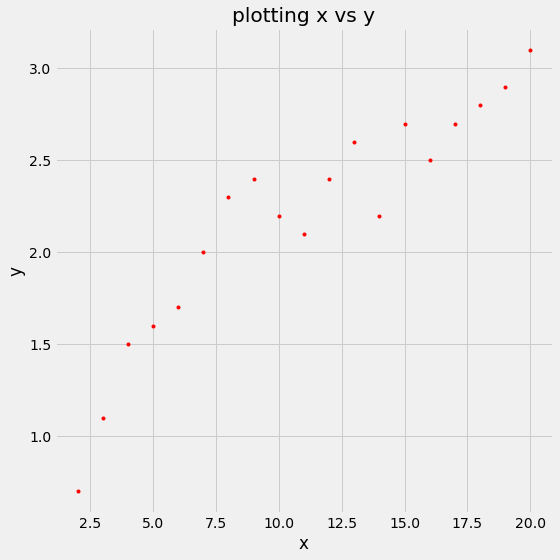

In [14]:
#plotting the data
plt.plot(x, y, 'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('plotting x vs y')
plt.show()

For the purpose of this exercise I will use the following three methods in order to plot the data: 
1. The Numpy Polyfit Method. 
2. The Scipy Optimize Method. 
3. The Scipy Curve fit Method.


1. I will calculate the analytical result using the numpy polyfit function. 

In [15]:
# previous analyitcal result
m_a, c_a = np.polyfit(x, y, 1)
#Print the m and c values (analytical results).
m_a, c_a

(0.10315789473684217, 1.0494736842105254)

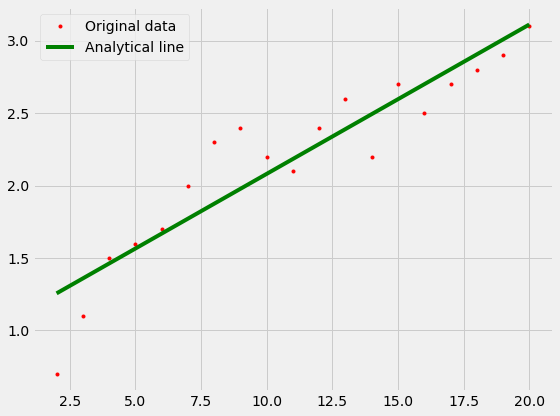

In [16]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'r.', label='Original data')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

In [17]:
# We are going to use minimize function in scipy.optimize.
# So - what do we need? First we need a function to minimze.

# x and y are have fixed values in this scenario as above.

# The function to be minimized - the cost function.
# It must take a single argument! But our cost function takes 2: m and c.
# So, we'll put them in a list called MC. e.g. MC = (5, 10)
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [18]:
# Run a quick test.
cost((5.0, 10.0))

88639.75

In [19]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (2.0, 2.0))
# Show the results.
result

      fun: 1.03957894736911
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([1.49011612e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [20]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(0.10315785999003411, 1.0494740589312146)

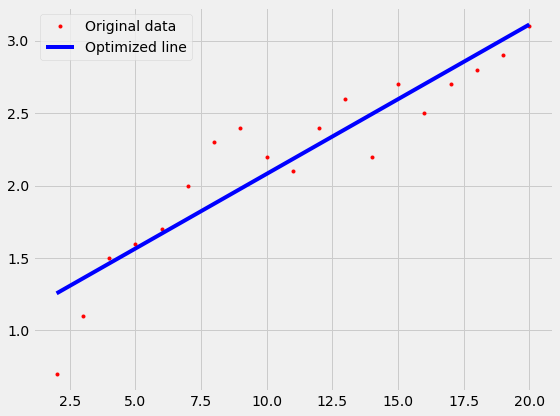

In [21]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'r.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.legend()

# Show the plot.
plt.show()

In [22]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Create the model function.
def f(x, m, c):
    return m * x + c

In [23]:
# Run curve_fit.
result = so.curve_fit(f, x, y)

In [24]:
# Look at the result.
result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [25]:
# Pull out the parameters.
m_f, c_f = result[0]
# Print values.
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

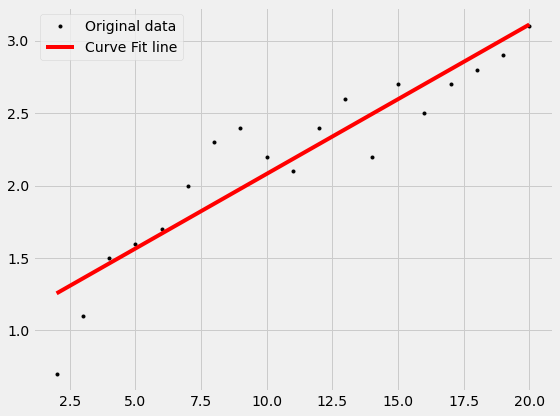

In [26]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
ax.legend()

# Show the plot.
plt.show()

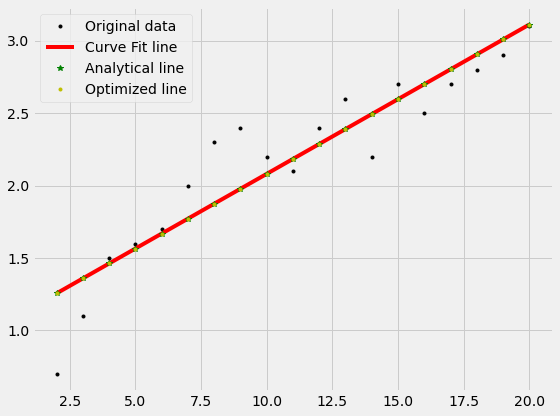

In [27]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
ax.plot(x, m_a * x + c_a, 'g*', label='Analytical line')
ax.plot(x, m_o * x + c_o, 'y.', label='Optimized line')
ax.legend()

# Show the plot.
plt.show()

## References. 
1. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2
2. https://www.bradthiessen.com/html5/docs/ols.pdf
3. https://towardsdatascience.com/comparing-robustness-of-mae-mse-and-rmse-6d69da870828
4. https://towardsdatascience.com/comparing-robustness-of-mae-mse-and-rmse-6d69da870828
